In [1]:
import torch
import torch.nn
import torch.nn.functional as F
from torch.autograd import Variable
import plotly.graph_objects as go
import matplotlib.pyplot as plt

# 生成数据

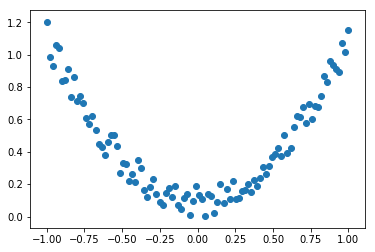

In [2]:
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2)+torch.rand(x.size())*0.2
x = Variable(x)
y = Variable(y)
plt.scatter(x.numpy(), y.numpy())
plt.show()
# scatter = go.Scatter(x=x.squeeze(1).data.numpy(),y=y.squeeze(1).data.numpy(),mode='markers')
# fig = go.Figure(scatter)
# fig.show()

# 构建神经网络

In [3]:
class Net(torch.nn.Module): #继承
    def __init__(self,n_feature,n_hidden,n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_feature,n_hidden) #从特征到隐藏层
        self.predict = torch.nn.Linear(n_hidden,n_output) #从隐藏层到输出
    def forward(self,x):
        x = F.relu(self.hidden(x)) #激活函数
        x = self.predict(x) #预测值
        return x


In [4]:
net = Net(1,10,1)
net

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)

# 损失函数

In [5]:
optimzer = torch.optim.SGD(net.parameters(),lr=0.5) #设置学习率为0.5,
loss_func = torch.nn.MSELoss()

# 开始训练 

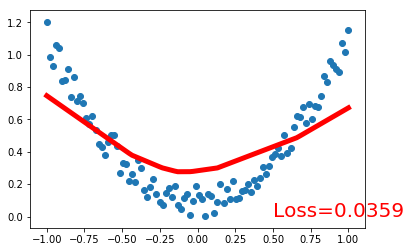

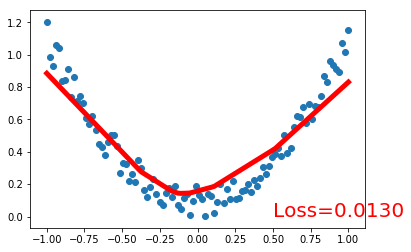

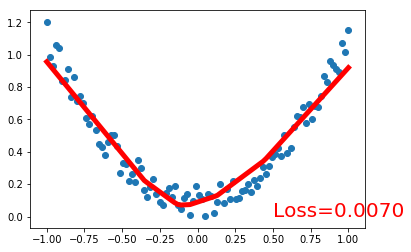

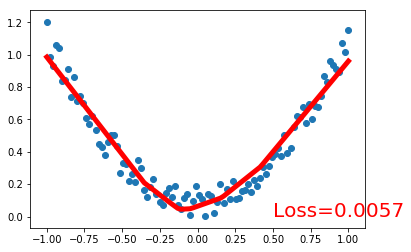

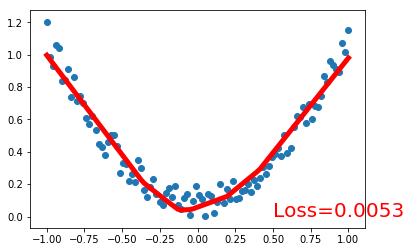

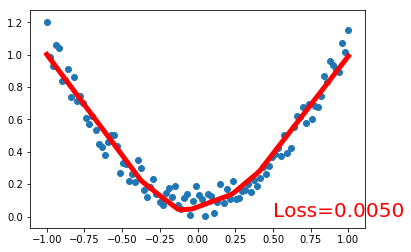

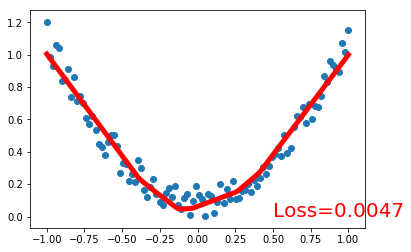

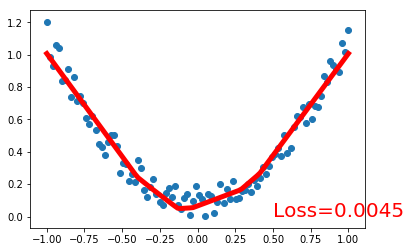

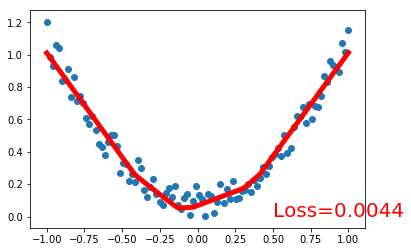

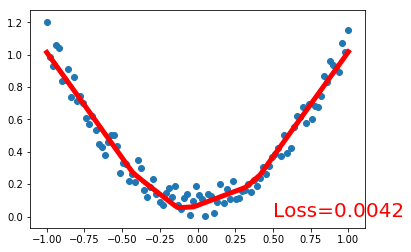

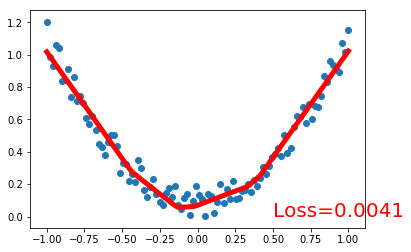

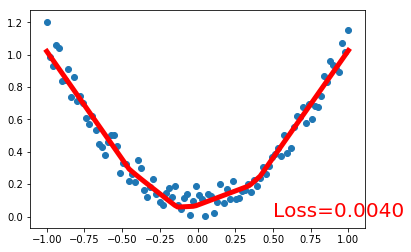

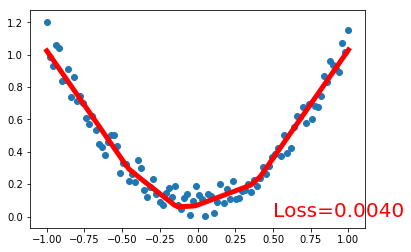

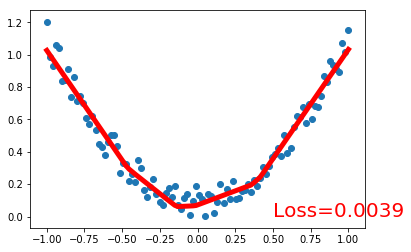

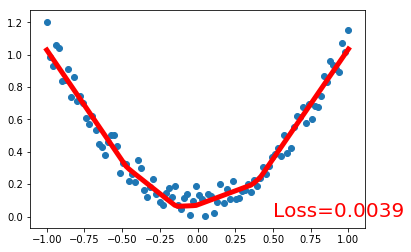

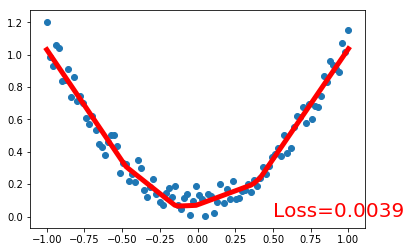

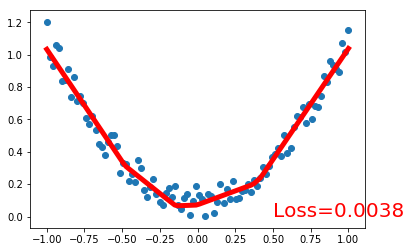

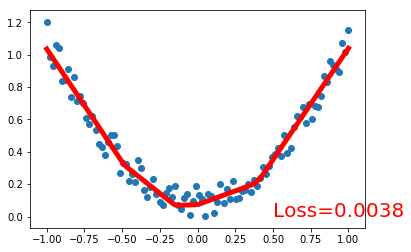

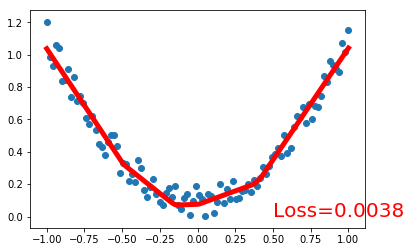

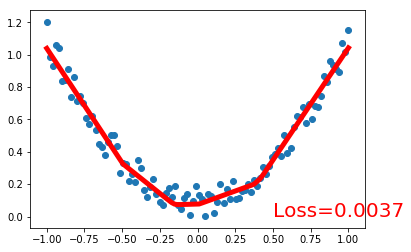

In [6]:
plt.ion()
for t in range(1,201): #训练200次
    prediction = net(x) #得到预测值
    loss = loss_func(prediction,y) #通过损失函数得到损失
    optimzer.zero_grad() #梯度设置为0
    loss.backward() #反向传播
    optimzer.step()
    if t%10==0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(),'r-',lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.item(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)
plt.ioff()
plt.show()
        